# Applying the Model

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
img_md_subset = pd.read_csv('../../../Data/ifcb_ecotaxa_subset_merged.csv')
img_md_subset = img_md_subset.drop('Unnamed: 0', 1)

In [6]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [7]:
import glob, os

file_dir = '../../../Data/all_imagery/'

os.chdir(file_dir)
fn_list = []
for file in glob.glob("*.png"):
    fn_list.append(file)
    
print(len(fn_list))

fn_edit = [x[:-4] for x in fn_list]

available_subset = img_md_subset[img_md_subset['object_id'].isin(fn_edit)]
len(available_subset)

5158003


1328483

In [44]:
frac = 0.05
int(len(available_subset) * frac)

66424

In [49]:
class_id_dict = {'amphiprora': 0,
 'chaetoceros': 1,
 'chaetoceros_mediophyceae': 2,
 'chlorophytes': 3,
 'ciliophora': 4,
 'corethron': 5,
 'cryptophytes': 6,
 'cylindrotheca': 7,
 'dactyliosolen': 8,
 'dinoflagellate_i': 9,
 'dinoflagellate_ii': 10,
 'dinoflagellate_iii': 11,
 'dinophyceae': 12,
 'eucampia': 13,
 'eucampia_chain': 14,
 'general_centric_diatoms': 15,
 'general_dinoflagellates': 16,
 'general_pennate_diatoms': 17,
 'gymnodinium': 18,
 'haptophytes': 19,
 'katodinium': 20,
 'nitzschia_frigida': 21,
 'other': 22,
 'proboscia': 23,
 'pseudo_nitzschia_chain': 24,
 'silicoflagellates': 25,
 'small_unidentified_cells': 26,
 'tintinnida': 27,
 'unidenfitied_chain_pennates': 28,
 'unidentified_chain_centrics': 29,
 'unidentified_diatoms': 30,
 'unidentified_flagellates': 31,
 'unidentified_living_cells': 32,
 'unidentified_single_centrics': 33,
 'unidentified_single_pennates': 34,
 'torodinium':35,
 'guinardia': 36,
 'ceratium' : 37}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

In [50]:
from tensorflow.keras.preprocessing import image
import numpy as np

images = []
labels = []
merged_labels = []
original_labels = []

for index, row in available_subset.sample(frac=frac).iterrows():
    
    # TODO need to think about optimal size and that size actually corresponds to class
    # maybe add blackspace instead of interpolating because it is changing the morphology

    img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
    images.append(image.img_to_array(img))
    labels.append(class_id_dict[row['merged_category']])
    merged_labels.append(row['merged_category'])
    original_labels.append(row['object_annotation_category'])
    
images = np.array(images)
labels = np.array(labels)
merged_labels = np.array(merged_labels)
original_labels = np.array(original_labels)

In [51]:
X_predict = images / 123
np.mean(X_predict), np.std(X_predict)

(1.0365102, 0.34437957)

In [52]:
from tensorflow import keras

model = keras.models.load_model('../model_weights.hdf5')

In [53]:
X_predict.shape

(66424, 150, 150, 1)

In [ ]:
def generate_data(directory, batch_size):
    """Replaces Keras' native ImageDataGenerator."""
    i = 0
    while True:
        
        images = []
        labels = []
        merged_labels = []
        original_labels = []

        for index, row in available_subset.sample(frac=frac).iterrows():

            # TODO need to think about optimal size and that size actually corresponds to class
            # maybe add blackspace instead of interpolating because it is changing the morphology

            img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
            images.append(image.img_to_array(img))
            labels.append(class_id_dict[row['merged_category']])
            merged_labels.append(row['merged_category'])
            original_labels.append(row['object_annotation_category'])
        
        
        
        image_batch = []
        for b in range(batch_size):
            if i == len(file_list):
                i = 0
                random.shuffle(file_list)
            sample = file_list[i]
            i += 1
            image = cv2.resize(cv2.imread(sample[0]), INPUT_SHAPE)
            image_batch.append((image.astype(float) - 128) / 128)

        yield np.array(image_batch)

In [54]:
predictions = np.argmax(model.predict(X_predict), axis=1)

In [ ]:
model.predict_generator(generator = tile_gen.tile_generator(clean_px, batch_size=100, flatten=True, canopy=True), steps=len(clean_px) // 100, verbose=1)

In [57]:
classes, counts = np.unique(predictions, return_counts=True)

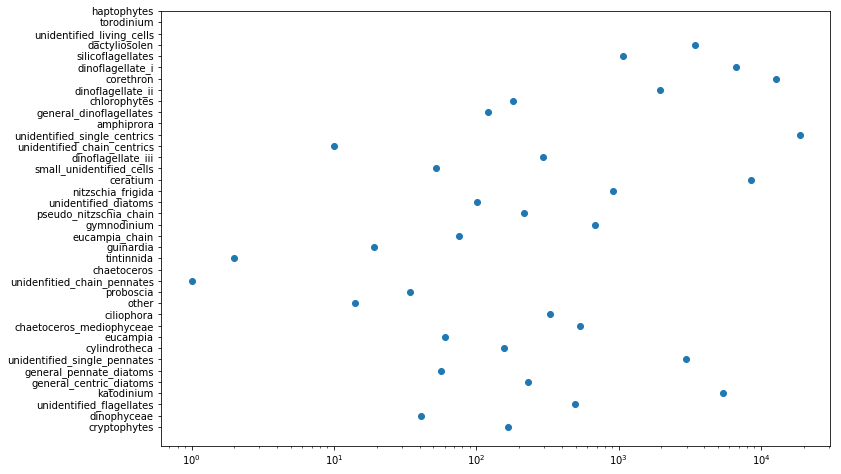

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(counts, classes)
ax.set_yticks(range(0,len(class_id_dict)))
ax.set_yticklabels(list(class_id_dict.keys()))
#ax.set_xlim(-10,500)
ax.set_xscale('log')
plt.show()

In [23]:
class_id_dict.keys()

dict_keys(['cryptophytes', 'dinophyceae', 'unidentified_flagellates', 'katodinium', 'general_centric_diatoms', 'general_pennate_diatoms', 'unidentified_single_pennates', 'cylindrotheca', 'eucampia', 'chaetoceros_mediophyceae', 'ciliophora', 'other', 'proboscia', 'unidenfitied_chain_pennates', 'chaetoceros', 'tintinnida', 'eucampia_chain', 'gymnodinium', 'pseudo_nitzschia_chain', 'unidentified_diatoms', 'nitzschia_frigida', 'small_unidentified_cells', 'dinoflagellate_iii', 'unidentified_chain_centrics', 'unidentified_single_centrics', 'amphiprora', 'general_dinoflagellates', 'chlorophytes', 'dinoflagellate_ii', 'corethron', 'dinoflagellate_i', 'silicoflagellates', 'dactyliosolen', 'unidentified_living_cells', 'haptophytes'])